<a href="https://colab.research.google.com/github/shiernee/CUZ_Deep_Learning/blob/main/SGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import Data
- SGA_trainingdata.csv
- SGA_testingdata.csv


In [1]:
# import
import pandas as pd

# Read the dataset from the CSV file
df_train = pd.read_csv('SGA_trainingdata.csv')
df_test = pd.read_csv('SGA_testingdata.csv')

# Display the first few rows of the dataset
print(df_train.head())


   Outcome  Age  Ethnics   BPD     HC  Cerebellum_tr   CM  EFW  Nuchal_fold  \
0        1   32        2  52.0  191.9           24.0  7.3  452         4.20   
1        1   33        2  54.5  191.4           22.4  6.8  389         3.90   
2        1   46        1  54.9  194.8           21.8  6.8  432         3.04   
3        1   38        3  52.1  196.4           23.4  7.3  420         3.91   
4        1   31        1  52.4  186.0           21.7  5.0  410         4.55   

      AC  Femur   Va   Vp   Hem  RI (Right)  PI (Right)  GA_wk  GA_scan_wk  
0  169.8   37.0  5.5  7.2  24.8           0        0.85     21           6  
1  160.5   33.7  6.5  7.2  27.1           0        0.63     21           5  
2  167.1   35.7  7.9  6.6  26.8           0        1.63     22           4  
3  157.9   37.1  7.7  5.7  24.8           0        0.92     22           2  
4  157.7   37.2  6.4  4.7  25.2           0        0.43     22           1  


In [2]:
# Assign X (the rest of the columns) and y (outcome) from the DataFrame
X_train = df_train.drop(columns=['Outcome'])  # Exclude the target column for features
y_train = df_train['Outcome']  # Target column

X_test = df_test.drop(columns=['Outcome'])  # Exclude the target column for features
y_test = df_test['Outcome']  # Target column

In [3]:
# Create the hidden layer structure
hidden_layer_sizes = (5)

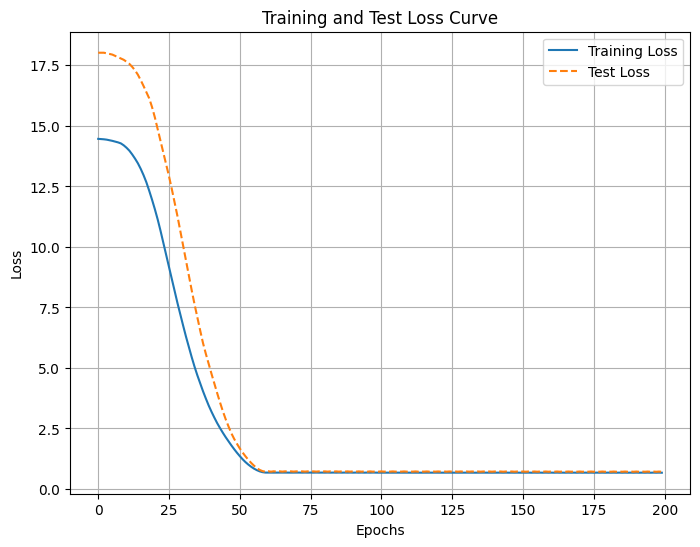

In [8]:
# model training
import matplotlib.pyplot as plt
import warnings
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


# Initialize the MLP classifier with warm_start
clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=1, warm_start=True, random_state=42)

# Variables to store loss at each epoch
train_loss_curve = []
test_loss_curve = []

# Define the number of epochs
n_epochs = 200

# Train incrementally while capturing train and test loss
for epoch in range(n_epochs):
    clf.fit(X_train, y_train)  # Incremental training with warm_start=True
    train_loss_curve.append(clf.loss_)  # Training loss
    test_loss_curve.append(log_loss(y_test, clf.predict_proba(X_test)))  # Test loss

# Plot the training and test loss curves
plt.figure(figsize=(8, 6))
plt.plot(train_loss_curve, label='Training Loss')
plt.plot(test_loss_curve, label='Test Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid()
plt.show()

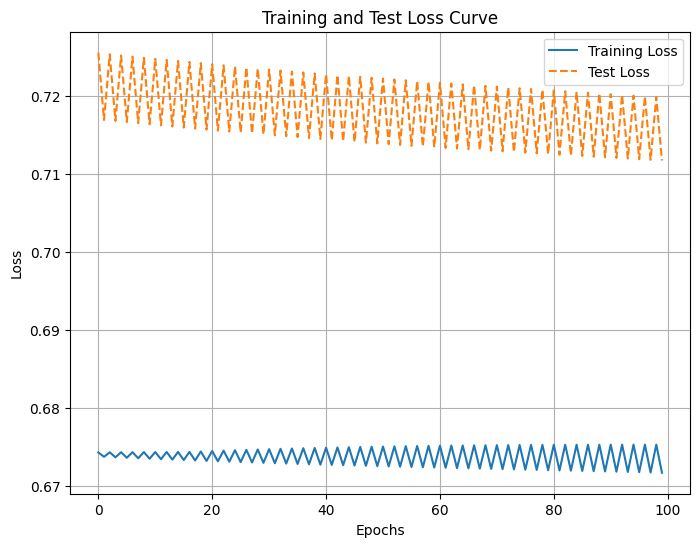

In [10]:
# Plot the training and test loss curves
plt.figure(figsize=(8, 6))
plt.plot(train_loss_curve[100:], label='Training Loss')
plt.plot(test_loss_curve[100:], label='Test Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid()
plt.show()

In [11]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
# Model Evaluation


from sklearn import metrics

print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.5
